In [ ]:
from io import StringIO

import incense
from incense import ExperimentLoader
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from src.static.settings import MONGO_URI, ENV_FILE_PATH, DATA_BASE
from src.main.load_data.load_semanticspaces import load_mds_representation, get_names, get_classes
from scripts.create_siddata_dataset import display_mds #TODO display in scripts?!

In [ ]:
def plot_2d_tsne(df, cat_name):
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.scatterplot(
        x="tsne_1", y="tsne_2",
        hue="Category",
        palette=sns.color_palette("bright", len(df["Category"].unique())),
        data=df,
        legend="full",
        alpha=0.7,
        ax=ax
    )
    ax.legend(loc=0, title=cat_name)
    plt.show()
    
    
def plot_3d_tsne(df, cat_name):
    #fig = px.scatter_3d(df, x='tsne_1', y='tsne_2', z='tsne_3', color='FB_long', opacity=0.7)#, size=[2]*len(df))
    fig = go.Figure()
    for ncol,part_df in enumerate(set(df["Category"])):
        fig.add_trace(
            go.Scatter3d(
                name=part_df,
                mode='markers',
                x=df[df["Category"] == part_df]["tsne_1"],
                y=df[df["Category"] == part_df]["tsne_2"],
                z=df[df["Category"] == part_df]["tsne_3"],
                marker=dict(            
                    color=ncol,
                    size=1.5,
                    line=dict(
                        width=0
                    )
                ),
            )
        )
    #fig.update_layout(showlegend=False)
    fig.update_layout(legend= {'itemsizing': 'constant'})
    fig.update_layout(margin=dict(l=2,r=2,t=20,b=2))
    fig.show()

In [ ]:
def show_exp(mds_dim, tsne_dim, data_set, exp_name, cat_name):
    loader = ExperimentLoader(
        mongo_uri=MONGO_URI, 
        db_name='Masterarbeit'
    )
    tsne_exps = loader.find_by_name(exp_name)
    latest_tsne = [i for i in tsne_exps if i.status == "COMPLETED" and i.config.get("tsne_dims") == tsne_dim and i.config.get("mds_dimensions") == mds_dim and i.config.get("data_set") == data_set][-1]

    tsne_arr = pd.read_csv(StringIO(latest_tsne.artifacts["tSNE"].content.decode("UTF-8")))
    classes = get_classes(DATA_BASE, data_set, what=cat_name)
    tsne_arr["Category"] = [val[0] if val else "None" for key, val in classes.items()]

    #TODO ACTUALLY these should be loaded from the experiment as well, but add_resource doesn't let me provide names
    mds, _ = load_mds_representation(DATA_BASE, data_set, mds_dim)
    names, _ = get_names(DATA_BASE, data_set)

    display_mds(mds, names, max_elems=2)

    if tsne_dim == 3:
        plot_3d_tsne(tsne_arr, cat_name)
    elif tsne_dim == 2:
        plot_2d_tsne(tsne_arr, cat_name)
        
    return latest_tsne

Experiment(id=1, name=Create_tSNE)

<span style="font-size:10pt"><span style="color: #0000ff">Roberto Arlt y la novela argentina a principios del siglo XX</span> is most similar to <span style="color: #0000ff">A2 Französisch Grundkurs II</span></span>

<span style="font-size:10pt"><span style="color: #0000ff">Didaktik I: Grundfragen der Didaktik (Tutorium 4)</span> is most similar to <span style="color: #0000ff">FFA Spanisch  - Derecho Administrativo</span></span>

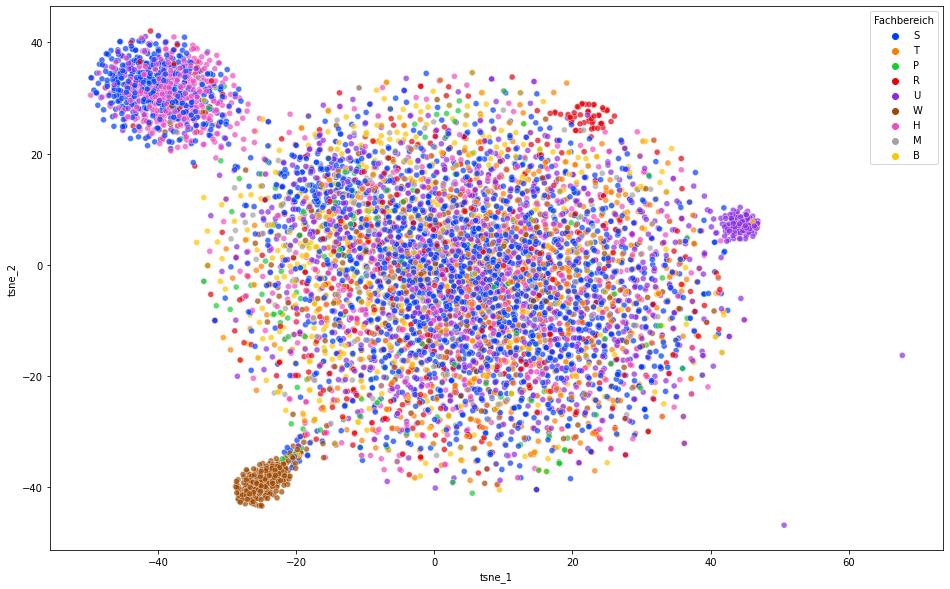

Experiment(id=1, name=Create_tSNE)

In [ ]:
show_exp(100, 2, "courses", "Create_tSNE", "Fachbereich")

In [ ]:
show_exp(100, 3, "courses", "Create_tSNE", "Fachbereich")

Experiment(id=2, name=Create_tSNE)

<span style="font-size:10pt"><span style="color: #0000ff">Roberto Arlt y la novela argentina a principios del siglo XX</span> is most similar to <span style="color: #0000ff">A2 Französisch Grundkurs II</span></span>

<span style="font-size:10pt"><span style="color: #0000ff">Didaktik I: Grundfragen der Didaktik (Tutorium 4)</span> is most similar to <span style="color: #0000ff">FFA Spanisch  - Derecho Administrativo</span></span>

Experiment(id=2, name=Create_tSNE)

* 3D Plot is interactive! You can twist & turn and also disable & enable individual categories using the legend!
* What do we see here? Well, there *definitely* is a cluster for WiWi (half of the courses are a very distinct cluster in every call of the graph), but for all others? puuuhhhh, shitty.

In [ ]:
show_exp(100, 2, "movies", "Create_tSNE", "Genres")

In [ ]:
show_exp(100, 3, "movies", "Create_tSNE", "Genres")

Experiment(id=3, name=Create_tSNE)

<span style="font-size:10pt"><span style="color: #0000ff">Monster-in-Law 2005</span> is most similar to <span style="color: #0000ff">The Necro Files 1997</span></span>

<span style="font-size:10pt"><span style="color: #0000ff">Kicking & Screaming 2005</span> is most similar to <span style="color: #0000ff">On Moonlight Bay 1951</span></span>

Experiment(id=3, name=Create_tSNE)